In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read Data

In [2]:
import pandas as pd
A = pd.read_csv("F:/Etlhive/Datasets/50_Startups.csv")

In [3]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Univariate Analysis (Quantitative)

<AxesSubplot:xlabel='PROFIT', ylabel='Density'>

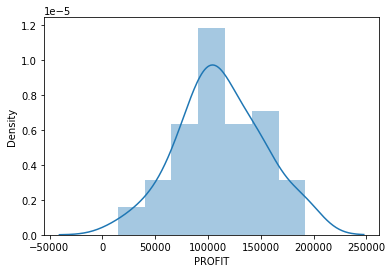

In [4]:
import seaborn as sb
sb.distplot(A.PROFIT)

<AxesSubplot:>

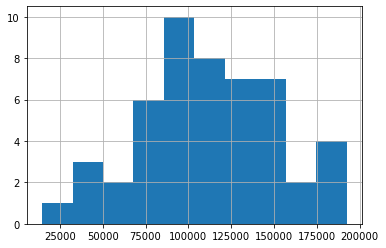

In [5]:
A.PROFIT.hist()

In [7]:
A = pd.read_csv("F:/Etlhive/Datasets/Cars93.csv")

In [8]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [9]:
A = A.drop(labels=["id","Make","Model"],axis=1)

In [10]:
A.isna().sum()

Manufacturer           0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [12]:
from PM8wdnew import replacer
replacer(A)

In [13]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes =="object"):
        cat.append(i)
    else:
        con.append(i)

In [14]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [15]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

# Create distribution plot for all continuous columns

<AxesSubplot:xlabel='EngineSize', ylabel='Density'>

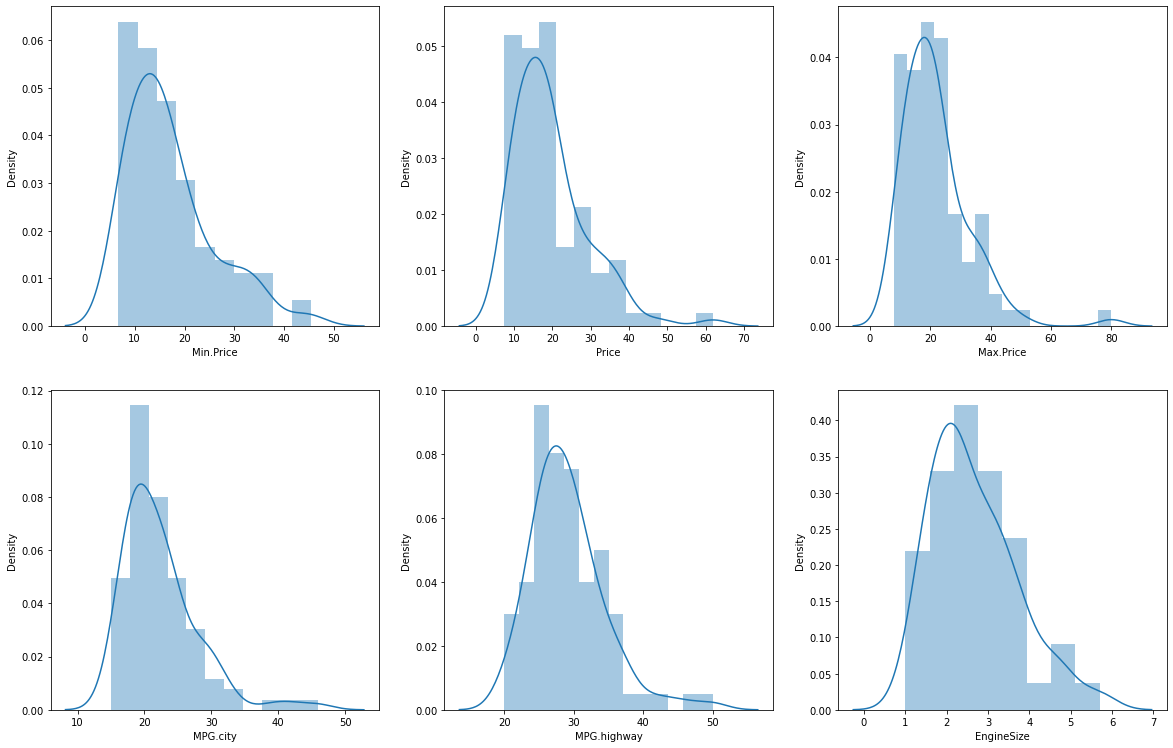

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sb.distplot(A['Min.Price'])
plt.subplot(3,3,2)
sb.distplot(A.Price)
plt.subplot(3,3,3)
sb.distplot(A['Max.Price'])
plt.subplot(3,3,4)
sb.distplot(A['MPG.city'])
plt.subplot(3,3,5)
sb.distplot(A['MPG.highway'])
plt.subplot(3,3,6)
sb.distplot(A.EngineSize)

In [21]:
nrows = len(con)/3
int(nrows)

6

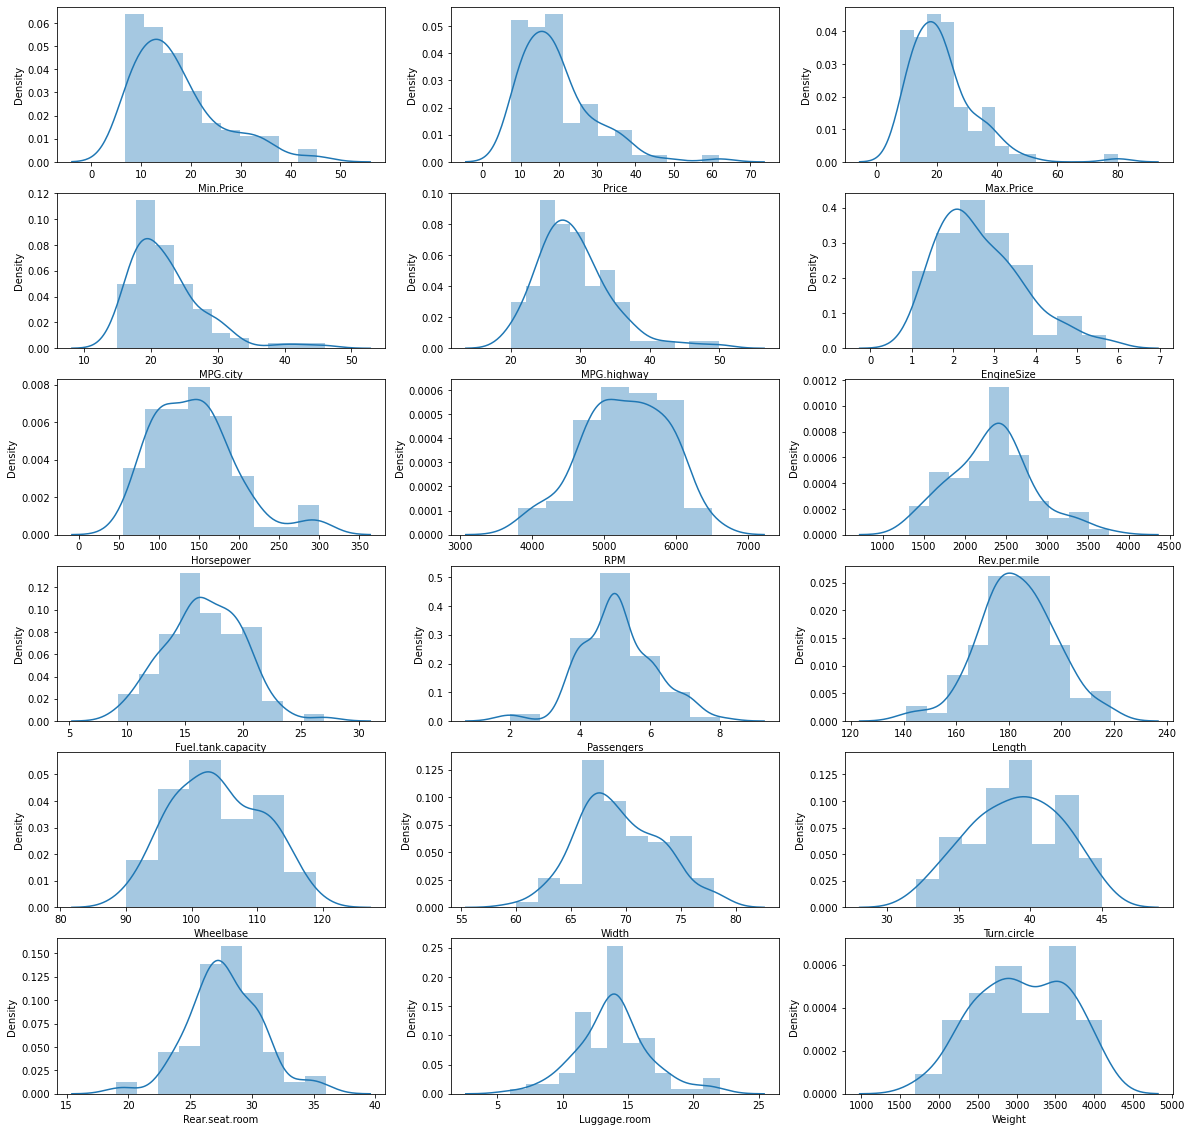

In [24]:
plt.figure(figsize=(20,20))
w = 1
for i in con:
    plt.subplot(int(nrows),3,w)
    sb.distplot(A[i])
    w = w + 1

# Univariate Analysis(Categorical)

In [25]:
A.AirBags.value_counts()

Driver only           46
None                  33
Driver & Passenger    14
Name: AirBags, dtype: int64

<AxesSubplot:>

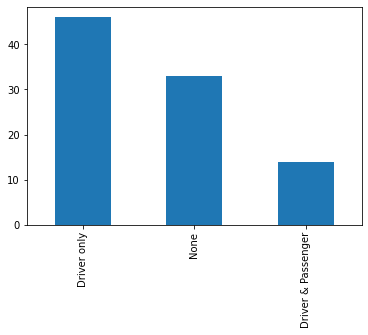

In [26]:
A.AirBags.value_counts().plot(kind="bar")

<AxesSubplot:>

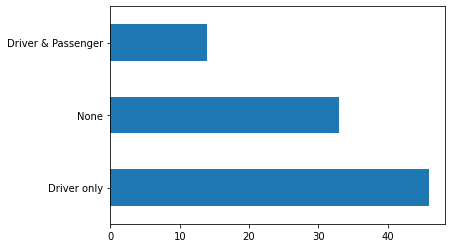

In [27]:
A.AirBags.value_counts().plot(kind="barh")

<AxesSubplot:ylabel='AirBags'>

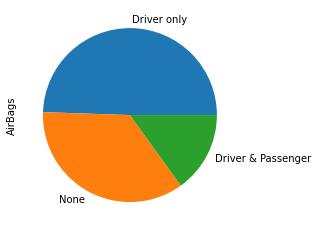

In [28]:
A.AirBags.value_counts().plot(kind="pie")

In [29]:
nrows = round(len(cat)/3,0)+1
nrows

3.0

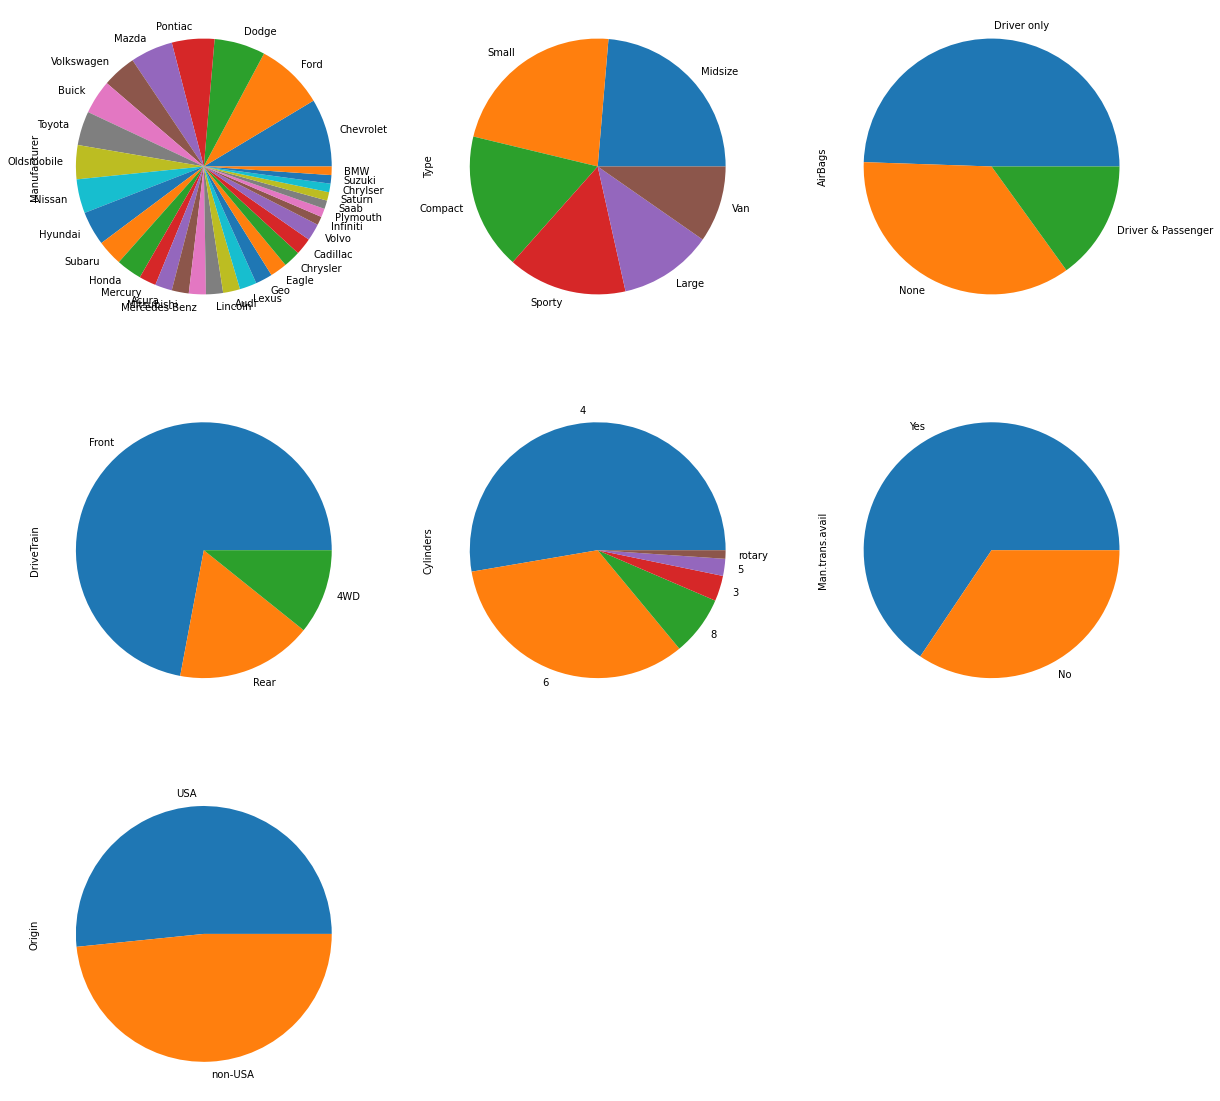

In [31]:
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(int(nrows),3,w)
    A[i].value_counts().plot(kind="pie")
    w = w + 1

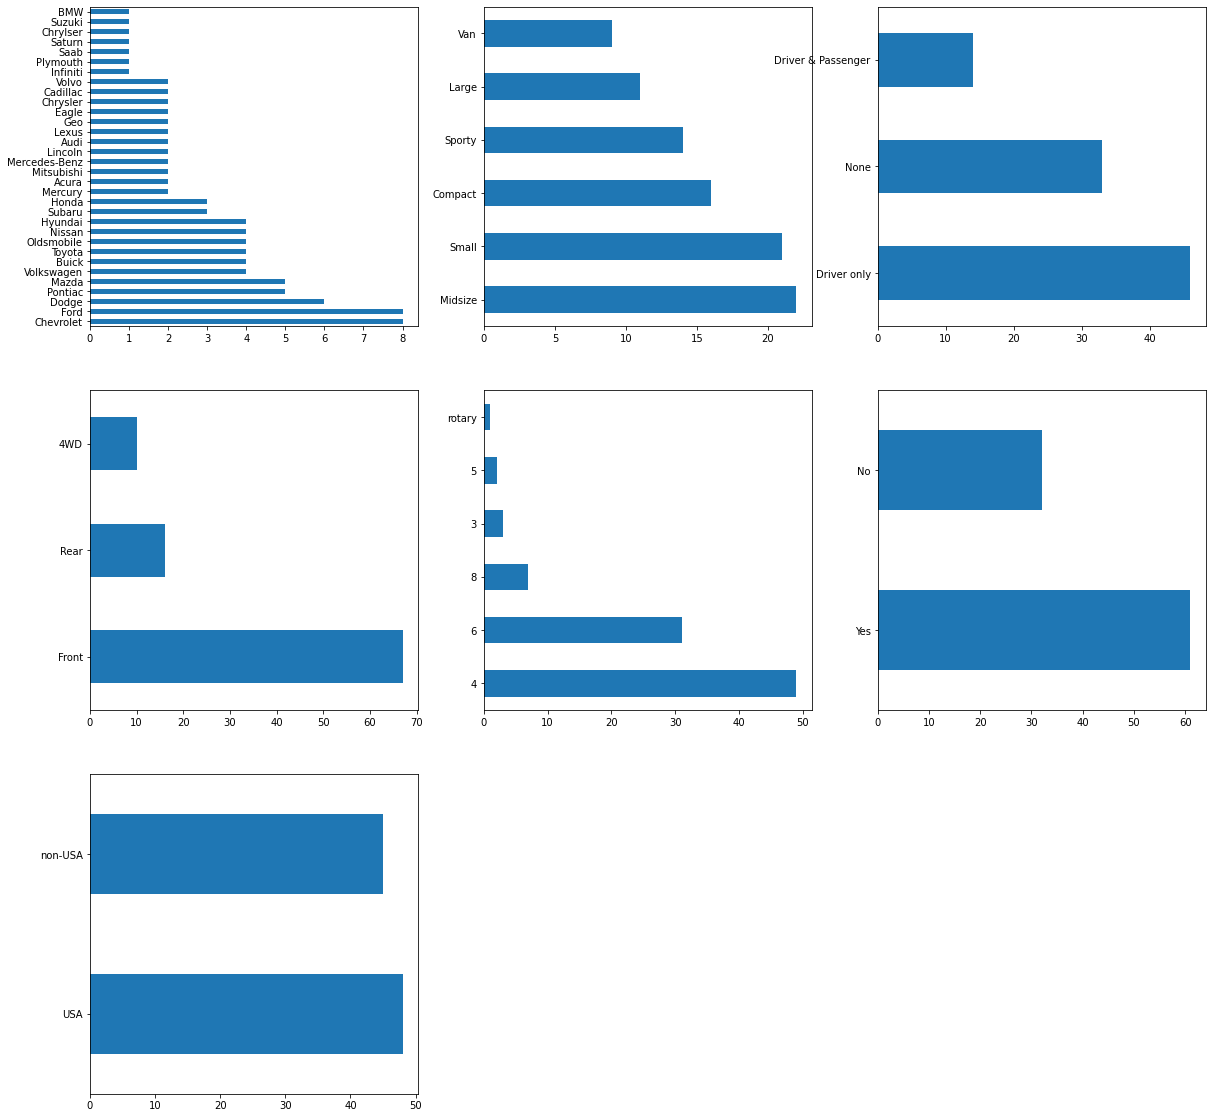

In [32]:
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(int(nrows),3,w)
    A[i].value_counts().plot(kind="barh")
    w = w + 1

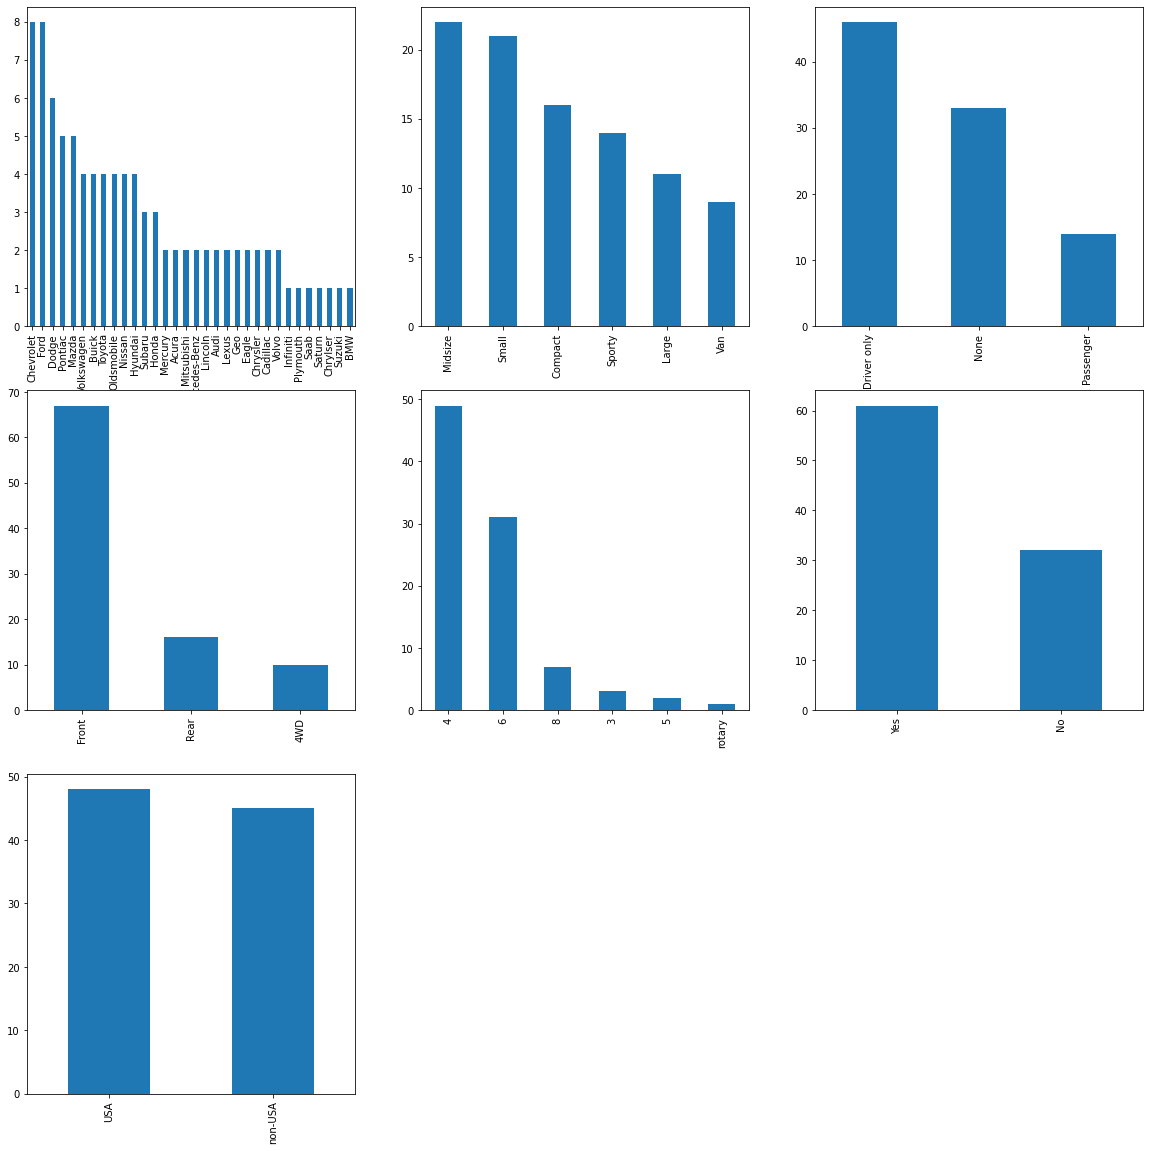

In [34]:
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(int(nrows),3,w)
    A[i].value_counts().plot(kind="bar")
    w = w + 1

# Bivariate Analysis (Scatterplot)

<AxesSubplot:xlabel='Price', ylabel='MPG.highway'>

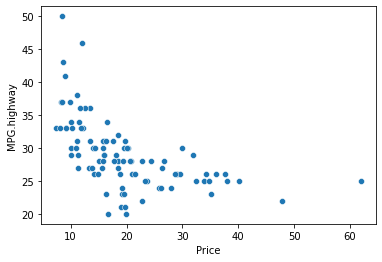

In [35]:
import seaborn as sb
sb.scatterplot(A.Price,A['MPG.highway'])

In [37]:
B = pd.read_csv("F:/Etlhive/Datasets/50_Startups.csv")

In [38]:
B.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

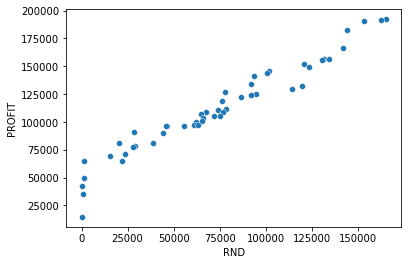

In [39]:
sb.scatterplot(B.RND,B.PROFIT)

Text(0.5, 1.0, 'RND vs Profit Scatterplot')

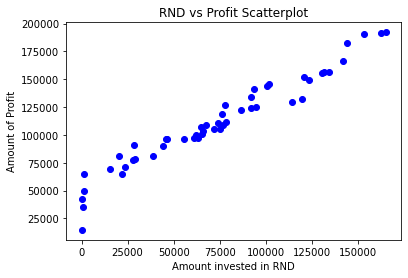

In [41]:
import matplotlib.pyplot as plt
plt.scatter(B.RND,B.PROFIT,c="blue")
plt.xlabel("Amount invested in RND")
plt.ylabel("Amount of Profit")
plt.title("RND vs Profit Scatterplot")

# Bivariate Analysis (Box Plot)

<AxesSubplot:xlabel='STATE', ylabel='PROFIT'>

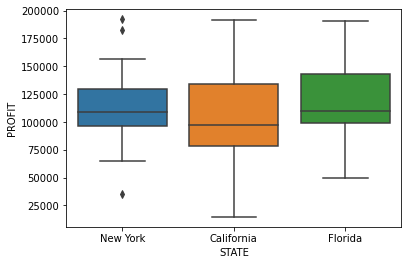

In [43]:
import seaborn as sb
sb.boxplot(B.STATE,B.PROFIT)

# Bivariate Analysis (Count plot using hue)

<AxesSubplot:xlabel='AirBags', ylabel='count'>

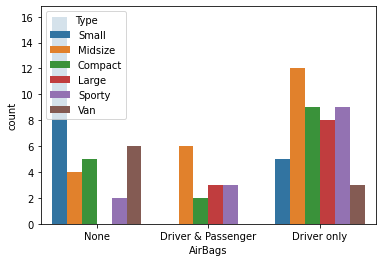

In [44]:
import seaborn as sb
sb.countplot(A.AirBags,hue=A.Type)